## CRISP - DM process:
#### 1) Business Undestanding
#### 2) Data Undestanding
#### 3) Prepare Data
#### 4) Data Modeling
#### 5) Evaluate the Results
#### 6) Deploy
<br>  

**I will be following the above process through this notebook. Let's get started**

### Business Undestanding: 
These are some business questions that intrigued me:  
Question 1. Which are the most popular technologies to work on ?  
Question 2. Which technologies pay you well ?  
Question 3. Working on which technologies gives the most job satisfaction ?  
Question 4. Which job profile is most popular ?  
Question 5. Which job profiles give you a higher salary ?  
Question 6. Working in which job profiles gives the most job satisfaction ?  
Question 7. What are the important factors that people look when assessing potential jobs to apply to ?  
Question 8. What are the important factors according to people when recruiting software developers ?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

In [2]:
df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(19102, 154)

### Data Undestanding:
We already have the data from Stackoverflow’s 2017 Annual Developer Survey, i will be using that to answer the questions above.
The survey has 19102 reviews (rows) and 153 questions that were in the survey. We probably won't be requiring all the columns for our task. Let's take a look at the columns useful to us:  
- Professional,  
- DeveloperType,   
- HaveWorkedLanguage,   
- HaveWorkedFramework,   
- HaveWorkedDatabase,   
- Methodology,  
- HaveWorkedPlatform  
- JobSatisfaction,   
- Salary,
- AssessJobIndustry,  
- AssessJobRole,  
- AssessJobExp,  
- AssessJobDept,  
- AssessJobTech,  
- AssessJobProjects,  
- AssessJobCompensation,  
- AssessJobOffice,  
- AssessJobCommute,  
- AssessJobRemote,  
- AssessJobLeaders,  
- AssessJobProfDevel,  
- AssessJobDiversity,  
- AssessJobProduct,  
- AssessJobFinances,  
- ImportantHiringAlgorithms,  
- ImportantHiringTechExp,  
- ImportantHiringCommunication,  
- ImportantHiringOpenSource,  
- ImportantHiringPMExp,  
- ImportantHiringCompanies,  
- ImportantHiringTitles,  
- ImportantHiringEducation,  
- ImportantHiringRep,  
- ImportantHiringGettingThingsDone  



### Data Preparation
We are now going to prepare our data to answer our desired questions. I will be doing the steps to prepare the data before each question. 

To answer Question 1, Question 2 and Question 3; I have made a new dataframe called 'df_tech' from the original full dataframe 'df'. It has columns related to the technologies people worked on, salary and job satisfaction. Also, I have selected responses of only professional developers, because they only would have worked professionally on the technologies in the industry.   

In [4]:
df_tech = df[['Professional', 'HaveWorkedLanguage', 'HaveWorkedFramework', 'HaveWorkedDatabase', 'Methodology', 'HaveWorkedPlatform', 'Salary', 'JobSatisfaction']]

df_tech = df_tech[df_tech['Professional'] == "Professional developer"]
df_tech.head()

,Professional,HaveWorkedLanguage,HaveWorkedFramework,HaveWorkedDatabase,Methodology,HaveWorkedPlatform,Salary,JobSatisfaction
2,Professional developer,Java; PHP; Python,NaN,MySQL,Agile; Lean; Scrum; Extreme; Pair; Kanban,NaN,113750.0,9.0
4,Professional developer,NaN,NaN,NaN,NaN,NaN,NaN,8.0
7,Professional developer,CoffeeScript; Clojure; Elixir; Erlang; Haskell...,React,Redis; MySQL; PostgreSQL,Agile; Pair; Kanban,Amazon Web Services (AWS),NaN,7.0
8,Professional developer,C#; JavaScript,AngularJS; Node.js; .NET Core,SQL Server,Agile; Scrum; Pair; Kanban; Domain-driven design,Android; Microsoft Azure,NaN,6.0
9,Professional developer,Objective-C; Swift,NaN,PostgreSQL,Agile; Scrum; Pair; Kanban,iOS; Amazon Web Services (AWS),NaN,8.0


**Question 1. Which are the most popular technologies to work on ?**  
Let us find the answer to this question. 

Below I have found the most popular technologies that people have worked on. For this I have taken the count of the people that have worked on a particular technology. 

The columns 'HaveWorkedLanguage', 'HaveWorkedFramework', 'HaveWorkedDatabase', 'Methodology', 'HaveWorkedPlatform' had the answer to our question. But since the people worked on different technologies during their career, so this column had multiple technologies enlisted seperated by the separator ';'.  
<br>
To solve this problem I had to __prepare__ my data first. The steps for it are as follows :  
1) Coverted data of the column to a string.  
2) Applied split() method on it with separator set to '; ' and expand = True. This makes separate column for each technology separated by the separator.  
3) Applied stack() method to make a single column of all the technologies.  
4) Counted the number of instances of each technology by using value_counts() method.  
5) Plotted the value counts as a bar chart using matplotlib.

In [5]:
pop_language = df_tech['HaveWorkedLanguage'].str.split('; ', expand=True).stack().value_counts()
pop_language

JavaScript        6913
SQL               5524
C#                3894
Java              3825
Python            2839
PHP               2560
C++               1919
C                 1555
TypeScript        1257
Ruby               988
Objective-C        715
Swift              669
VB.NET             557
Go                 506
Scala              441
Perl               392
Groovy             391
CoffeeScript       369
Assembly           355
R                  304
VBA                295
Matlab             282
Visual Basic 6     219
Lua                217
Smalltalk          165
F#                 162
Haskell            138
Elixir             121
Rust               120
Clojure            120
Erlang              75
Common Lisp         54
Dart                36
Hack                25
Julia               23
dtype: int64

I have plotted the results from the previous step below.

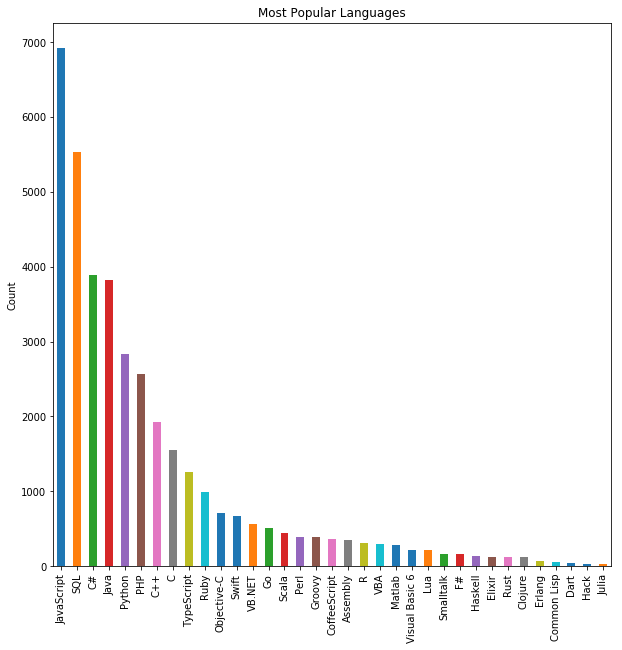

In [6]:
plt.figure(figsize=(10,10))
plt.ylabel('Count')
plt.title('Most Popular Languages')
pop_language.plot(kind="bar")
plt.savefig('Most Popular Languages')

In [7]:
pop_framework = df_tech['HaveWorkedFramework'].str.split('; ', expand=True).stack().value_counts()
pop_framework

AngularJS    2847
Node.js      2798
.NET Core    1968
React        1383
Cordova       647
Firebase      522
Xamarin       494
Hadoop        317
Spark         279
dtype: int64

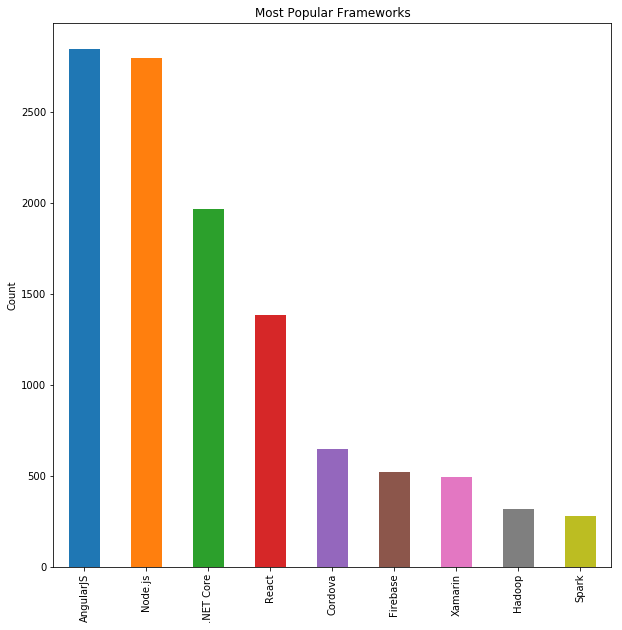

In [8]:
plt.figure(figsize=(10,10))
plt.ylabel('Count')
plt.title('Most Popular Frameworks')
pop_framework.plot(kind="bar")
plt.savefig('Most Popular Frameworks')

In [9]:
pop_database = df_tech['HaveWorkedDatabase'].str.split('; ', expand=True).stack().value_counts()
pop_database

MySQL         4291
SQL Server    3589
PostgreSQL    2432
SQLite        2192
MongoDB       1843
Redis         1532
Oracle        1396
Cassandra      305
dtype: int64

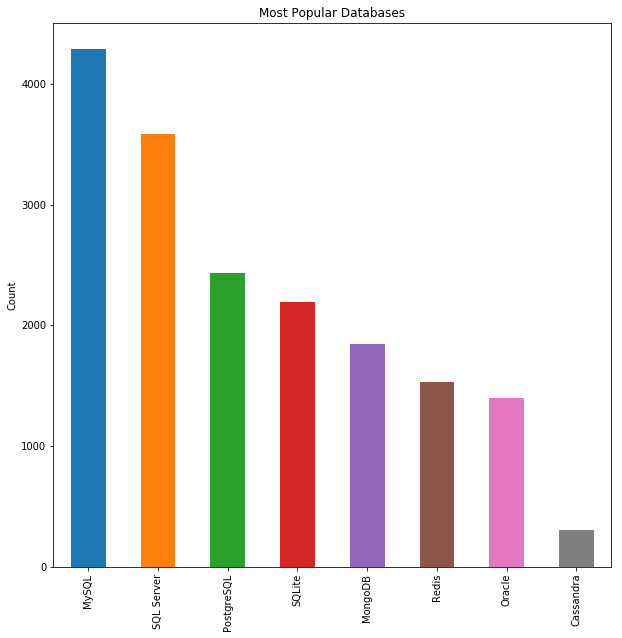

In [10]:
plt.figure(figsize=(10,10))
plt.ylabel('Count')
plt.title('Most Popular Databases')
pop_database.plot(kind="bar")
plt.savefig('Most Popular Databases')

In [11]:
pop_methodologies = df_tech['Methodology'].str.split('; ', expand=True).stack().value_counts()
pop_methodologies

Agile                   6419
Scrum                   5542
Pair                    3667
Kanban                  3075
Waterfall               1980
Extreme                 1605
Domain-driven design    1222
Lean                    1108
Mob                      321
Evidence-based SWE       285
PRINCE2                  183
dtype: int64

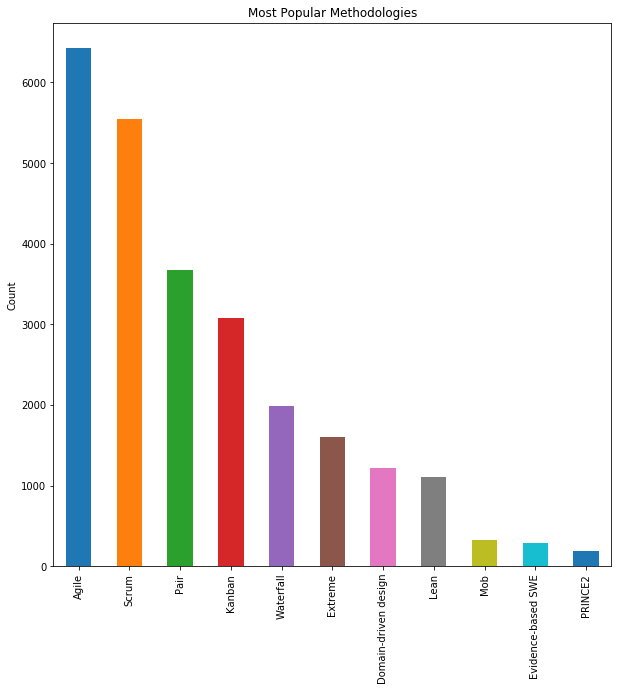

In [12]:
plt.figure(figsize=(10,10))
plt.ylabel('Count')
plt.title('Most Popular Methodologies')
pop_methodologies.plot(kind="bar")
plt.savefig('Most Popular Methodologies')

In [13]:
pop_platform = df_tech['HaveWorkedPlatform'].str.split('; ', expand=True).stack().value_counts()
pop_platform

Windows Desktop              3130
Amazon Web Services (AWS)    2665
Linux Desktop                2374
Android                      1991
Mac OS                       1585
iOS                          1371
Microsoft Azure              1148
WordPress                    1071
Raspberry Pi                 1021
Arduino                       549
Windows Phone                 295
SharePoint                    292
Salesforce                    216
Serverless                    214
Mainframe                     111
dtype: int64

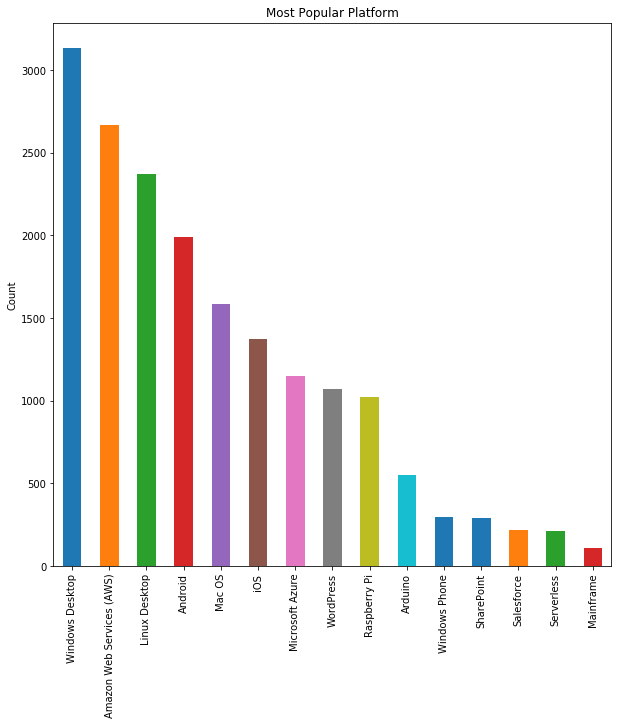

In [14]:
plt.figure(figsize=(10,10))
plt.ylabel('Count')
plt.title('Most Popular Platform')
pop_platform.plot(kind="bar")
plt.savefig('Most Popular Platform')

### Evaluate the Results
From the graphs we can observe the following results:  

- *Most and Least Popular Language to work on*  
JavaScript is the most popular language with 6913 people having worked on it and Julia was the least popular with just 23 people having worked on it. Python the much hyped language was in 5th position with 2839 people having worked on it.    
<br>  
- *Most and Least Popular Framework to work on*  
AngularJS (count 2847) followed closely by Node.js (count 2798) were the most popular frameworks that people worked on. While Spark (count 279) was the framework with least people having worked on.    
<br>
- *Most and Least Popular Database to work on*  
The most and least popular databases were MySQL (count 4291) and Cassandra (count 305) respectively.  
<br>
- *Most and Least Popular Methodology to work on*  
Agile (count 6419) was by far the most popular methodology and PRINCE2 (count 183) was the least popular one.  
<br>
- *Most and Least Popular Platforms to work on*  
Windows Desktop (count 3130) was the most popular platform, while Mainframe (count 111) was the least popular one.  

**Question 2. Which technologies pay you well ?**   
I think this is the most important question for the developers out there. Let us find the answer to it.

I have used the same columns that were used to answer the previous question with the addition of "Salary" column.  

Since, a single person worked on many different technologies but has only one salary, so we can not directly find the salary corresponding to a particular technology. To get an approximate estimate of it I have taken the mean of the salary of the people having worked on a particular technology. This will atleast give an idea of the salary corresponding to the technology, even if not the exact amount. 

The follwing **Data Prepartion** steps were followed to answer the question : 

1) I have created a new dataframe 'sal_language' consisting of the required columns for relation between salary and programming language.  
2) Deleted the rows with NaN values in 'Salary', 'HaveWorkedLanguage' column. **I have deleted them beacause both these column values are essential for a relation between them.**

In [15]:
sal_language = df_tech[['HaveWorkedLanguage', 'Salary']]
sal_language = sal_language.dropna(subset=['Salary', 'HaveWorkedLanguage'], axis=0)
sal_language.head()

,HaveWorkedLanguage,Salary
2,Java; PHP; Python,113750.0
14,Assembly; C; C++,100000.0
17,C; Clojure; JavaScript; Matlab; Rust; SQL; Swift,130000.0
22,Java,100764.0
25,Java; Scala,175000.0


3) I created a function below "col_split()" to split values in the 'HaveWorkedLanguage' column (having multiple languages separated by ';') and create a single column with multiple rows, one for each language. The working of the function can be seen below:

In [16]:
def col_split(col_to_split, col_value, df):
    """
    Working:
    -------------------
    Fuction to split the column values separated by some separator. 
    And preserving the value of another column (col_value) so all the rows obtained 
    from column values (col_to_split) have the same value as that of original column.
    
    Parameters:
    --------------------
    col_to_split: column with values separated by some separator to be splitted.
    col_value: column whose value has to be preserved.
    df: DataFrame containing both the above columns
    
    Returns:
    ---------------------
    df_splited: DataFrame after the spliting and preserving of values is done.
    
    """
    df_splited = pd.DataFrame(columns = [col_to_split, col_value])
    for index, row in df.iterrows():
        columns = row[col_to_split].split('; ')
        for column in columns:
            df_splited.loc[len(df_splited)] = [column, row[col_value]]

    return df_splited

In [17]:
sal_language_split = col_split('HaveWorkedLanguage', 'Salary', sal_language)
sal_language_split.head()

,HaveWorkedLanguage,Salary
0,Java,113750.0
1,PHP,113750.0
2,Python,113750.0
3,Assembly,100000.0
4,C,100000.0


4) Take the mean of the salaries grouped by the programming languages.

In [18]:
avg_sal_language = sal_language_split.groupby(['HaveWorkedLanguage']).mean()['Salary'].sort_values(ascending=False)
avg_sal_language.head()

HaveWorkedLanguage
Smalltalk    83019.311525
Go           75609.529516
Clojure      72902.688097
Erlang       72797.652192
Perl         71946.515854
Name: Salary, dtype: float64

5) Plot the mean of the salary obtained from previous step against the programming languages. 

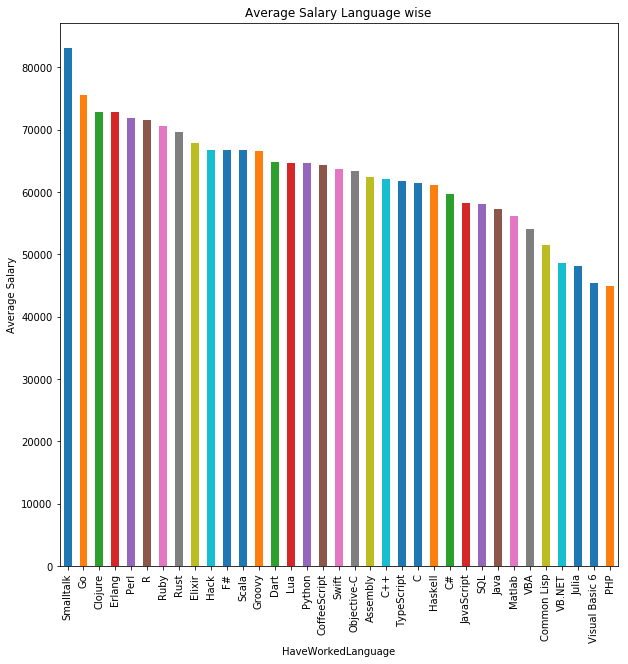

In [19]:
plt.figure(figsize=(10,10))
plt.ylabel('Average Salary')
plt.title('Average Salary Language wise')
avg_sal_language.plot(kind = 'bar')
plt.savefig('Average Salary Language wise')

**Question 3. Working on which technologies gives the most job satisfaction ?**  
This again is an interesting question. Let us find the answer to it.

Similar **Data preparation** steps were followed to find the relation between technologies and job satisfaction. The only difference being that "JobSatisfaction" column was used instead of "Salary".

HaveWorkedLanguage
Hack           7.666667
Smalltalk      7.493750
Erlang         7.432432
Dart           7.424242
Objective-C    7.403983
Name: JobSatisfaction, dtype: float64


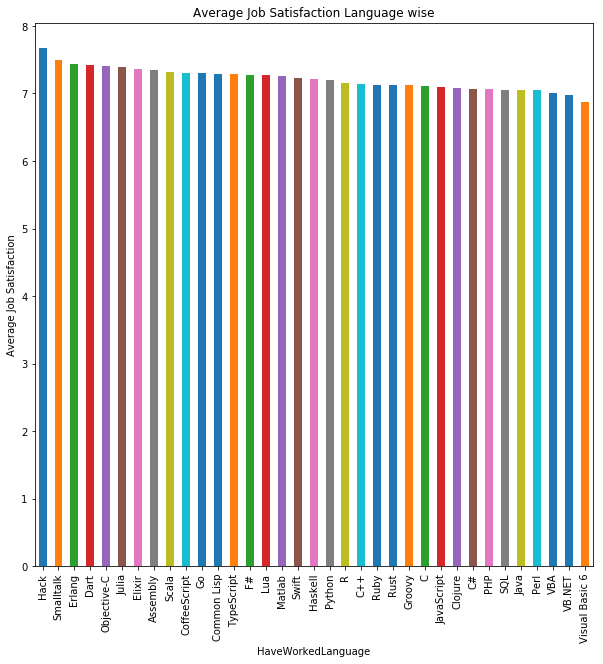

In [20]:
job_satis_language = df_tech[['HaveWorkedLanguage', 'JobSatisfaction']]
job_satis_language = job_satis_language.dropna(subset=['JobSatisfaction', 'HaveWorkedLanguage'], axis=0)

job_satis_language_split = col_split('HaveWorkedLanguage', 'JobSatisfaction', job_satis_language)

avg_job_satis_language = job_satis_language_split.groupby(['HaveWorkedLanguage']).mean()['JobSatisfaction'].sort_values(ascending=False)

print(avg_job_satis_language.head())

plt.figure(figsize=(10,10))
plt.ylabel('Average Job Satisfaction')
plt.title('Average Job Satisfaction Language wise')
avg_job_satis_language.plot(kind = 'bar')
plt.savefig('Average Job Satisfaction Language wise')

**Answer to Question 2 and 3 for Frameworks.**

HaveWorkedFramework
Spark        78079.351169
Hadoop       72819.110926
React        63734.148533
Node.js      60733.397276
.NET Core    59812.283737
Name: Salary, dtype: float64


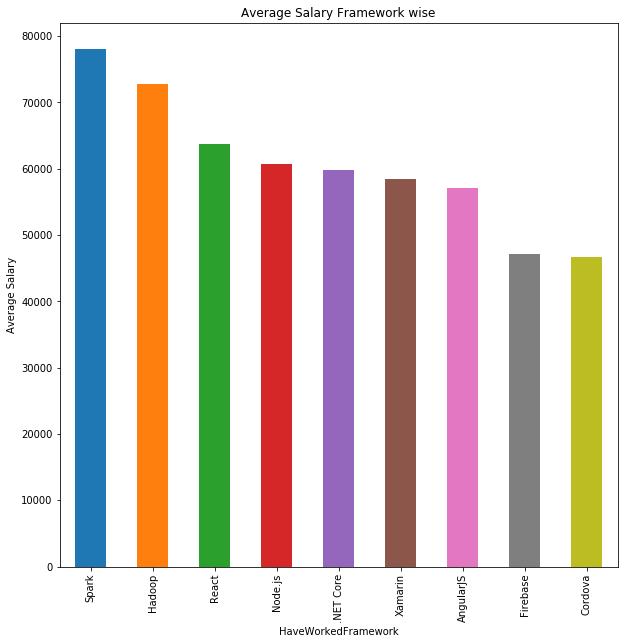

In [21]:
sal_framework = df_tech[['HaveWorkedFramework', 'Salary']]
sal_framework = sal_framework.dropna(subset=['Salary', 'HaveWorkedFramework'], axis=0)

sal_framework_split = col_split('HaveWorkedFramework', 'Salary', sal_framework)

avg_sal_framework = sal_framework_split.groupby(['HaveWorkedFramework']).mean()['Salary'].sort_values(ascending=False)
print(avg_sal_framework.head())

plt.figure(figsize=(10,10))
plt.ylabel('Average Salary')
plt.title('Average Salary Framework wise')
avg_sal_framework.plot(kind = 'bar')
plt.savefig('Average Salary Framework wise')

HaveWorkedFramework
Spark      7.357934
React      7.239050
Node.js    7.216881
Hadoop     7.170418
Xamarin    7.159420
Name: JobSatisfaction, dtype: float64


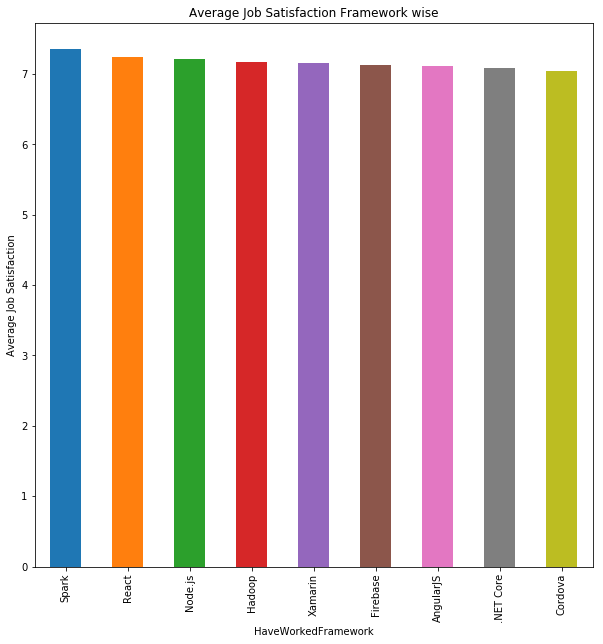

In [22]:
job_satis_framework = df_tech[['HaveWorkedFramework', 'JobSatisfaction']]
job_satis_framework = job_satis_framework.dropna(subset=['JobSatisfaction', 'HaveWorkedFramework'], axis=0)

job_satis_framework_split = col_split('HaveWorkedFramework', 'JobSatisfaction', job_satis_framework)

avg_job_satis_framework = job_satis_framework_split.groupby(['HaveWorkedFramework']).mean()['JobSatisfaction'].sort_values(ascending=False)
print(avg_job_satis_framework.head())

plt.figure(figsize=(10,10))
plt.ylabel('Average Job Satisfaction')
plt.title('Average Job Satisfaction Framework wise')
avg_job_satis_framework.plot(kind = 'bar')
plt.savefig('Average Job Satisfaction Framework wise')

**Answer to Question 2 and 3 for Databases.**

HaveWorkedDatabase
Cassandra     74818.365860
Redis         63879.947349
PostgreSQL    61760.873763
SQL Server    60200.856177
SQLite        56084.077695
Name: Salary, dtype: float64


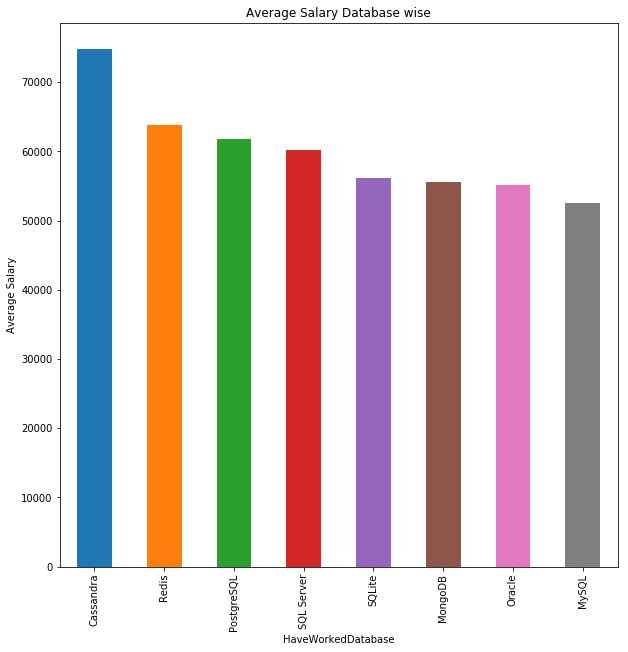

In [23]:
sal_database = df_tech[['HaveWorkedDatabase', 'Salary']]
sal_database = sal_database.dropna(subset=['Salary', 'HaveWorkedDatabase'], axis=0)

sal_database_split = col_split('HaveWorkedDatabase', 'Salary', sal_database)

avg_sal_database = sal_database_split.groupby(['HaveWorkedDatabase']).mean()['Salary'].sort_values(ascending=False)
print(avg_sal_database.head())

plt.figure(figsize=(10,10))
plt.ylabel('Average Salary')
plt.title('Average Salary Database wise')
avg_sal_database.plot(kind = 'bar')
plt.savefig('Average Salary Database wise')

HaveWorkedDatabase
Redis         7.269076
PostgreSQL    7.248628
MongoDB       7.205327
Cassandra     7.200669
SQLite        7.141914
Name: JobSatisfaction, dtype: float64


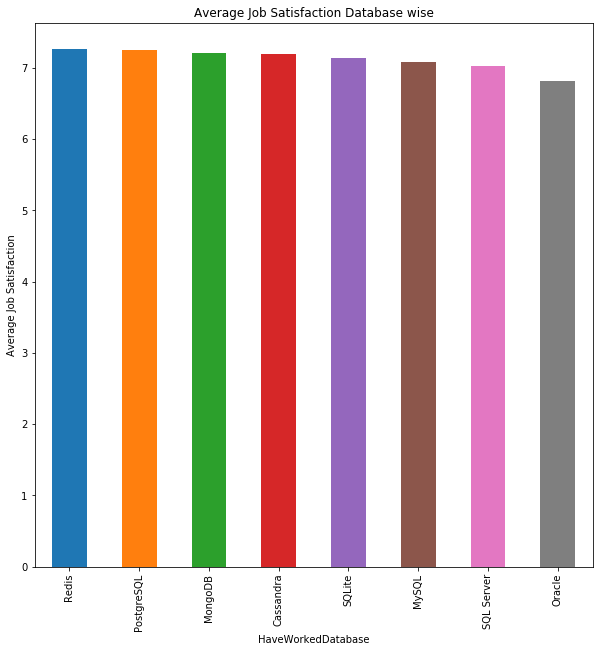

In [24]:
job_statis_database = df_tech[['HaveWorkedDatabase', 'JobSatisfaction']]
job_statis_database = job_statis_database.dropna(subset=['JobSatisfaction', 'HaveWorkedDatabase'], axis=0)

job_statis_database_split = col_split('HaveWorkedDatabase', 'JobSatisfaction', job_statis_database)

avg_job_statis_database = job_statis_database_split.groupby(['HaveWorkedDatabase']).mean()['JobSatisfaction'].sort_values(ascending=False)
print(avg_job_statis_database.head())

plt.figure(figsize=(10,10))
plt.ylabel('Average Job Satisfaction')
plt.title('Average Job Satisfaction Database wise')
avg_job_statis_database.plot(kind = 'bar')
plt.savefig('Average Job Satisfaction Database wise')

### Evaluate the Results  
From the graphs we can observe the following results:  

1) For Programming Languages:
- Smalltalk had the highest average salary, while PHP had the least average salary.
- Hack had the highest job satisfaction rate, while Visual Basic 6 had the least job satisfaction rate.

2) For Frameworks:
- Spark had the highest average salary, while Cordova had the least average salary.
- Spark had the highest job satisfaction rate, while Cordova had the least job satisfaction rate.

3) For Databases:
- Cassandra had the highest average salary, while MySQL had the least average salary.
- Redis had the highest job satisfaction rate, while Oracle had the least job satisfaction rate.

**Some insights:**  
- Generally we can see that the technology with a higher avarage salary had a higher job satisfaction rate. This may be because people who are paid higher are more satisfied with thier jobs rather than others.  
- Combined with insights from question 1 , there is also some general pattern with the least popular technologies having a higher average salary. This may be because of limited number of people having the knowledge of that technology so their demand is more. Similarly, most popular technologies having a lower average salary because of easy availibilty of people knowing that technology.
- Another insight is that people working on niche technologies seemed to be more satisfied with their jobs, this may be beacuse of higher salary that is coming with them or maybe because of a confident feeling of working on something unique not known by many (i know a bit far fetched but still relevant i think).

To answer Question 4, Question 5 and Question 6; I have created dataframe called 'df_profile' from the original full dataframe 'df'. It has 'Professional', 'DeveloperType', 'Salary', 'JobSatisfaction' columns. Here also, I have used the responses of only professional developers, because 'DeveloperType' column that tells us about the job profile of a developer makes sense for Professional developers only.

In [25]:
df_profile = df[['Professional', 'DeveloperType', 'Salary', 'JobSatisfaction']]

df_profile = df_profile[df_profile['Professional'] == "Professional developer"]
df_profile.head()

,Professional,DeveloperType,Salary,JobSatisfaction
2,Professional developer,Other,113750.0,9.0
4,Professional developer,Mobile developer; Graphics programming; Deskto...,NaN,8.0
7,Professional developer,Web developer,NaN,7.0
8,Professional developer,Web developer; Mobile developer,NaN,6.0
9,Professional developer,Mobile developer; Desktop applications developer,NaN,8.0


**Question 4. Which job profile is most popular ?**  

The number of people having worked in a particular job profile is counted to find the most popular job profile. **Data Preparation**  steps similar to what were followed to answer question 1 are followed here also. Just instead of 'HaveWorkedLanguage' column (in question 1) here 'DeveloperType' column is used. Because the format of the data entry i.e. entries separated by separator ";" remains same in both the columns. 

In [26]:
pop_profile = df_profile['DeveloperType'].str.split('; ', expand=True).stack().value_counts()
pop_profile

Web developer                                            10085
Desktop applications developer                            3867
Mobile developer                                          2905
Database administrator                                    1827
DevOps specialist                                         1505
Developer with a statistics or mathematics background     1479
Systems administrator                                     1478
Embedded applications/devices developer                   1174
Data scientist                                            1077
Other                                                      996
Graphics programming                                       584
Machine learning specialist                                488
Graphic designer                                           439
Quality assurance engineer                                 429
dtype: int64

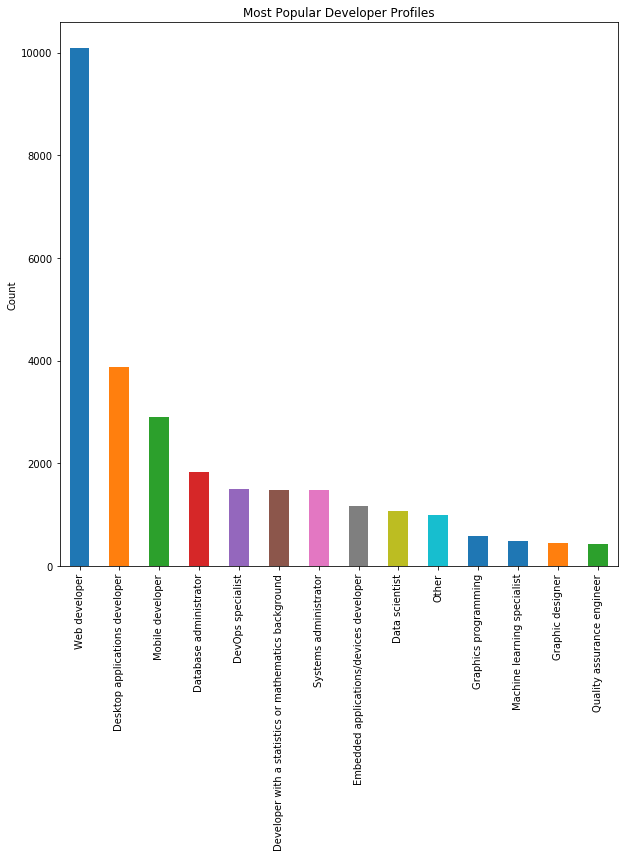

In [27]:
plt.figure(figsize=(10,10))
plt.ylabel('Count')
plt.title('Most Popular Developer Profiles')
pop_profile.plot(kind="bar")
plt.savefig('Most Popular Developer Profiles')

**Question 5. Which job profiles give you a higher salary ?**  
Similar process as that to answer question 2 was followed to answer this question also. That is, I have :  
1) Created dataframe 'sal_profile' having 'DeveloperType', 'Salary' columns.  
2) Dropped all the rows with NaN value in the columns 'DeveloperType', 'Salary'. It was done because these two values are essential to find the relation between the two.    
3) Splitted the values in the column using col_split() function to get a single row for each developer profile.  
4) Grouped by the 'DeveloperType' column and taken the mean of the 'Salary' column to get average salary for each profile.  
5) Plotted the average salaries against developer profiles as a bar graph.

DeveloperType
Other                                                    74823.355198
DevOps specialist                                        70390.995413
Machine learning specialist                              69067.545882
Data scientist                                           65572.904236
Developer with a statistics or mathematics background    63641.376282
Name: Salary, dtype: float64


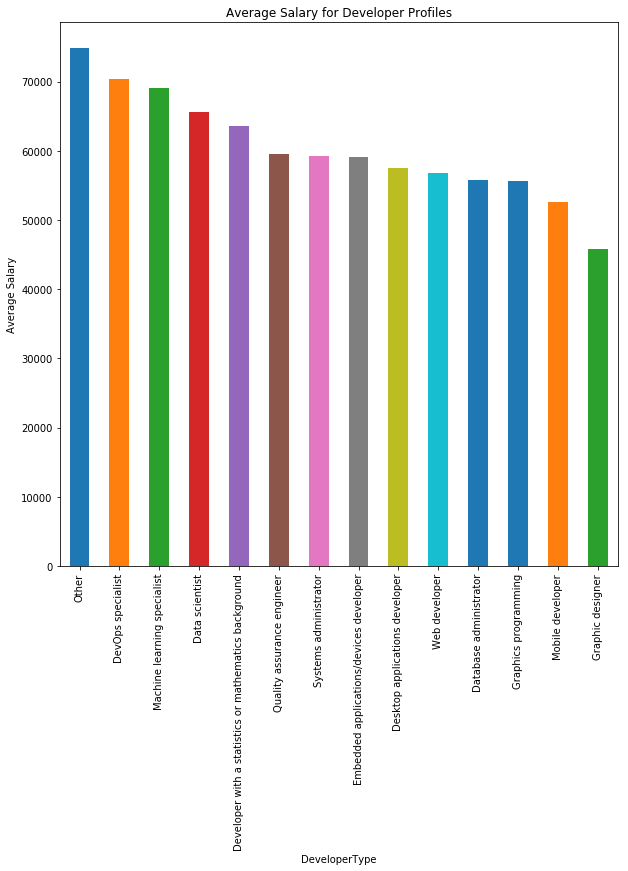

In [28]:
sal_profile = df_profile[['DeveloperType', 'Salary']]
sal_profile = sal_profile.dropna(subset=['Salary', 'DeveloperType'], axis=0)

sal_profile_split = col_split('DeveloperType', 'Salary', sal_profile)

avg_sal_profile = sal_profile_split.groupby(['DeveloperType']).mean()['Salary'].sort_values(ascending=False)
print(avg_sal_profile.head())

plt.figure(figsize=(10,10))
plt.ylabel('Average Salary')
plt.title('Average Salary for Developer Profiles')
avg_sal_profile.plot(kind = 'bar')
plt.savefig('Average Salary for Developer Profiles')

**Question 6. Working in which job profiles gives the most job satisfaction ?**  
Similar process as that to answer question 5 was followed to answer this question also. Just instead of 'Salary' column 'JobSatisfaction' was used.

DeveloperType
Machine learning specialist    7.390830
Data scientist                 7.335283
Other                          7.275468
DevOps specialist              7.227459
Quality assurance engineer     7.222760
Name: JobSatisfaction, dtype: float64


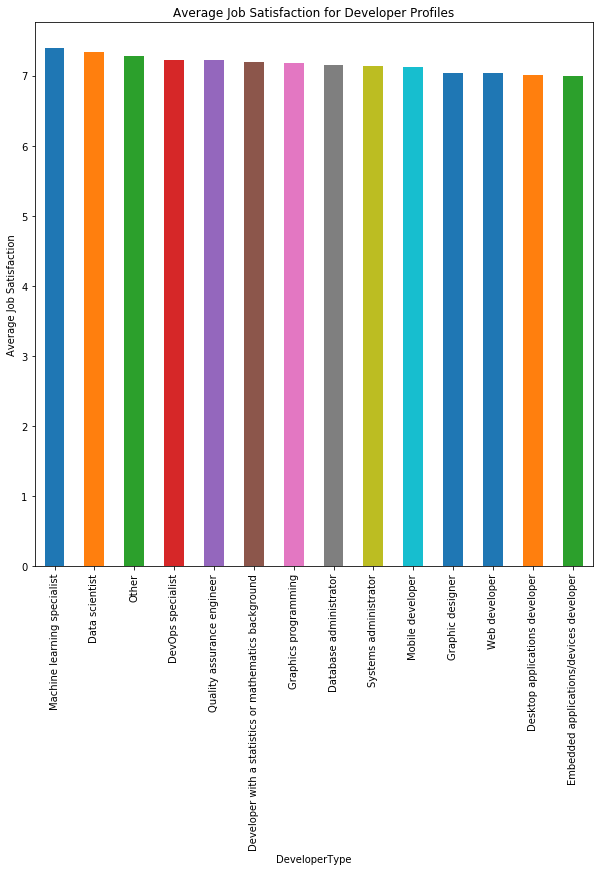

In [29]:
job_satis_profile = df_profile[['DeveloperType', 'JobSatisfaction']]
job_satis_profile = job_satis_profile.dropna(subset=['JobSatisfaction', 'DeveloperType'], axis=0)

job_satis_profile_split = col_split('DeveloperType', 'JobSatisfaction', job_satis_profile)

avg_job_satis_profile = job_satis_profile_split.groupby(['DeveloperType']).mean()['JobSatisfaction'].sort_values(ascending=False)
print(avg_job_satis_profile.head())

plt.figure(figsize=(10,10))
plt.ylabel('Average Job Satisfaction')
plt.title('Average Job Satisfaction for Developer Profiles')
avg_job_satis_profile.plot(kind = 'bar')
plt.savefig('Average Job Satisfaction for Developer Profiles')

### Evaluate the Results  
From the graphs above we can answer the questions :

1) **Question 4. Which job profile is most popular ?** 
- Web developer (count 10085) was the most popular job profile by a huge margin compared to the second most popular job profile of Desktop applications developer (count 3867). Quality assurance engineer (count 429) was the least popular job profile.  

2) **Question 5. Which job profiles give you a higher salary ?**
- "Other" profile gave the highest average salary. We can not know exactly what job profiles constitutes other, but we can assume that it will have highly specialised job profiles, so they demand a higher pay.   
- DevOps specialist was on the second number.  
- Machine learning specialist, Data scientist, Developer with a statistics or mathematics background were 3rd, 4th, 5th respectively. This seems interesting as these three profiles have a lot in common and are closely related to each other. 
- Graphic designer was the profile with least average salary.

3) **Question 6. Working in which job profiles gives the most job satisfaction ?**
- Machine learning specialist, Data scientist were the job profiles with highest job satisfaction rate.   
- Embedded applications/devices developer was the profile with the least job satisfaction.  

**Some Insights:**  
- The general pattern of higher salary profile having a higher job satisfaction was followed here also, but with some exceptions.
- Embedded applications/devices developer was the profile with the least job satisfaction even though it was somewhere in the middle of average salaries graph.
- It was surprising to see DevOps specialist, profile with highest average salary, 4th in job satisfaction rate.  
- It maybe that working as a Machine learning specialist or Data scientist gives people more job satisfaction compared to others. 
- We can see that job satisfaction is somewhat related to salary, but it depends on other factors also apart from salary. Which makes sense according to me, clearly "Money can't always buy happiness."


**Question 7. What are the important factors that people look when assessing potential jobs to apply to ?**  
The question will be of much significance to hiring managers. Let us see its answer below. 

**Data Preparation**  
- The columns of interest to answer this question are 'AssessJobIndustry', 'AssessJobRole', 'AssessJobExp', 'AssessJobDept', 'AssessJobTech', 'AssessJobProjects', 'AssessJobCompensation', 'AssessJobOffice', 'AssessJobCommute', 'AssessJobRemote', 'AssessJobLeaders', 'AssessJobProfDevel', 'AssessJobDiversity','AssessJobProduct', 'AssessJobFinances'.  
- These columns signify different attributes that people look when assessing potential jobs. They are categorical oridinal features that take values from ['Very important', 'Important', 'Somewhat important', 'Not very important', 'Not at all important']. We will see a way to handle them and extract oridinal information from them step by step.  

The following **Data Preparation** steps were followed:  
1) Created a new DataFrame "df_assess_job" having the relevant columns from original DataFrame "df".

In [30]:
df_assess_job = df[['AssessJobIndustry', 
              'AssessJobRole', 
              'AssessJobExp', 
              'AssessJobDept', 
              'AssessJobTech', 
              'AssessJobProjects', 
              'AssessJobCompensation', 
              'AssessJobOffice', 
              'AssessJobCommute', 
              'AssessJobRemote', 
              'AssessJobLeaders', 
              'AssessJobProfDevel', 
              'AssessJobDiversity', 
              'AssessJobProduct', 
              'AssessJobFinances' ]]

df_assess_job.head()

,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances
0,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat important,Somewhat important,Somewhat important,Important,Important,Very important,Important,Very important,Important,Somewhat important,Not very important,Very important,Important,Very important,Very important
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2) Created a dictionary "importance_levels" this encodes ordinal categorical variables in numerical form preserving the ordinal information. You can see below the encoding with a higher numeric value (=5) given to most significant categorical and least numeric value (=1) given to least significant categorical. 

In [31]:
importance_levels = {'Very important':5, 
                     'Important':4, 
                     'Somewhat important':3, 
                     'Not very important':2, 
                     'Not at all important':1}

3) Created a function "col_score()" to return the scores of the columns signifying the importance level of those features. It basically finds the average of the numeric values in the column after encoding to numeric values and do this for all the columns. To find the average i have deleted the rows with NaNs in the column, as NaN give us no information. You can find the function below for more detail:

In [32]:
def col_score(df, importance_levels):
    """
    Working:
    -------------------
    Function takes the dataframe with categorical columns. 
    According to encoding given in dictionary importance_levels, 
    it finds the average of values in a column, thus giving a column score.
    It do this process for all the columns and returns a pandas series 
    with column names and their respective scores
    
    Parameters:
    --------------------
    df: DataFrame containing the categorical columns.
    importance_levels: column with values separated by some separator to be splitted.
    
    Returns:
    ---------------------
    scores_col_all: Pandas Series having the names of the columns with their respective score sorted in a descending order.
    
    """
        
    scores_col_all = pd.Series()
    
    for col in df.columns:
        score_col=0
        for importance, value in importance_levels.items():
            score_col = score_col + (df[col].value_counts()/len(df[col].dropna()))[importance]*value
        scores_col_all[col] = score_col

    return scores_col_all.sort_values(ascending=False)
    

In [33]:
print("Important factors and their score (out of 5) when assessing potential jobs to apply to according to people:")
scores_assess_job = col_score(df_assess_job, importance_levels)
scores_assess_job

Important factors and their score (out of 5) when assessing potential jobs to apply to according to people:


AssessJobProfDevel       4.234264
AssessJobCompensation    4.101701
AssessJobTech            4.002138
AssessJobOffice          3.996401
AssessJobCommute         3.951146
AssessJobProjects        3.849382
AssessJobExp             3.576923
AssessJobDept            3.566389
AssessJobFinances        3.538379
AssessJobRole            3.535999
AssessJobProduct         3.426206
AssessJobRemote          3.418513
AssessJobIndustry        3.373051
AssessJobLeaders         3.298079
AssessJobDiversity       2.978256
dtype: float64

4) Plot the column scores against the column names. 

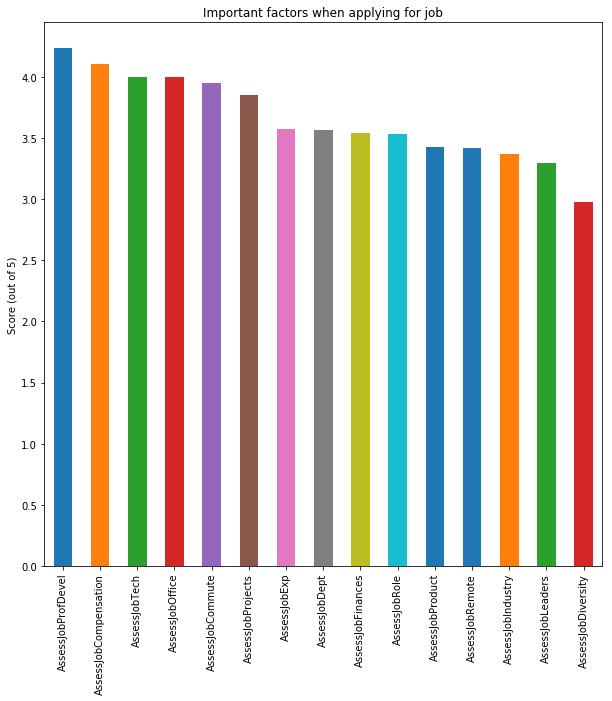

In [34]:
plt.figure(figsize=(10,10))
plt.ylabel('Score (out of 5)')
plt.title('Important factors when applying for job')
scores_assess_job.plot(kind = 'bar')
plt.savefig('Important factors when applying for job')

### Evaluate the Results  
From the above graph we can see that:  
1) Top most things that people look for when assessing potential jobs to apply to :
- AssessJobProfDevel: Opportunities for professional development
- AssessJobCompensation: The compensation and benefits offered
- AssessJobTech: The languages, frameworks, and other technologies they would be working with

2) Bottom most things that people look for when assessing potential jobs to apply to :
- AssessJobDiversity: The diversity of the company or organization
- AssessJobLeaders: The reputations of the company's senior leaders
- AssessJobIndustry: The industry that they would be working in

**Insights:**  
- It is intersting to see that Opportunities for professional development are quite important to people infact more important than the compensation and benefits offered.
- It is a bit surprising to see that Job diversity is least important to people, still the scociety is not open to new perspectives i think in this case.

**Question 8. What are the important factors according to people when recruiting software developers ?**  
This question is of imprtance for the people looking for jobs. Lets find this answer.

**Data Preparation**  
- The columns of interest to answer this question are 'ImportantHiringAlgorithms', 'ImportantHiringTechExp', 'ImportantHiringCommunication', 'ImportantHiringOpenSource', 'ImportantHiringPMExp', 'ImportantHiringCompanies', 'ImportantHiringTitles', 'ImportantHiringEducation', 'ImportantHiringRep', 'ImportantHiringGettingThingsDone'.
- These columns signify different attributes that people look when when recruiting software developers. They are categorical oridinal features that take values from ['Very important', 'Important', 'Somewhat important', 'Not very important', 'Not at all important']. We will see a way to handle them and extract oridinal information from them step by step.  
- These columns are similar those we have seen in the previous question, so we will be using the same method to extract importance of each feature according to people as we have done in previous question.


The following **Data Preparation** steps were followed:  
1) Created a new DataFrame "df_hire_imp" having the relevant columns from original DataFrame "df".

In [35]:
df_hire_imp = df[['ImportantHiringAlgorithms',
                'ImportantHiringTechExp',
                'ImportantHiringCommunication',
                'ImportantHiringOpenSource',
                'ImportantHiringPMExp',
                'ImportantHiringCompanies',
                'ImportantHiringTitles',
                'ImportantHiringEducation',
                'ImportantHiringRep',
                'ImportantHiringGettingThingsDone'
                 ]]

df_hire_imp.head()

,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone
0,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important
1,Important,Important,Important,Important,Somewhat important,Somewhat important,Not very important,Somewhat important,Not very important,Very important
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat important,Somewhat important,Very important,Very important,Somewhat important,Somewhat important,Not very important,Not very important,Important,Very important
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2) Used the same importance_levels dictionary as previously encoding the ordinal categorical variables to numeric values.  
3) Used the function "col_score()" to give a score (out of 5) to each of the columns.

In [36]:
print("Important factors and their score (out of 5) when recruiting software developers according to people:")
scores_hire_imp = col_score(df_hire_imp, importance_levels)
scores_hire_imp

Important factors and their score (out of 5) when recruiting software developers according to people:


ImportantHiringCommunication        4.102859
ImportantHiringGettingThingsDone    4.096414
ImportantHiringAlgorithms           3.713315
ImportantHiringTechExp              3.493024
ImportantHiringPMExp                2.835955
ImportantHiringCompanies            2.807944
ImportantHiringOpenSource           2.791329
ImportantHiringEducation            2.749426
ImportantHiringTitles               2.692145
ImportantHiringRep                  2.213458
dtype: float64

4) Plot the column scores against the column names.

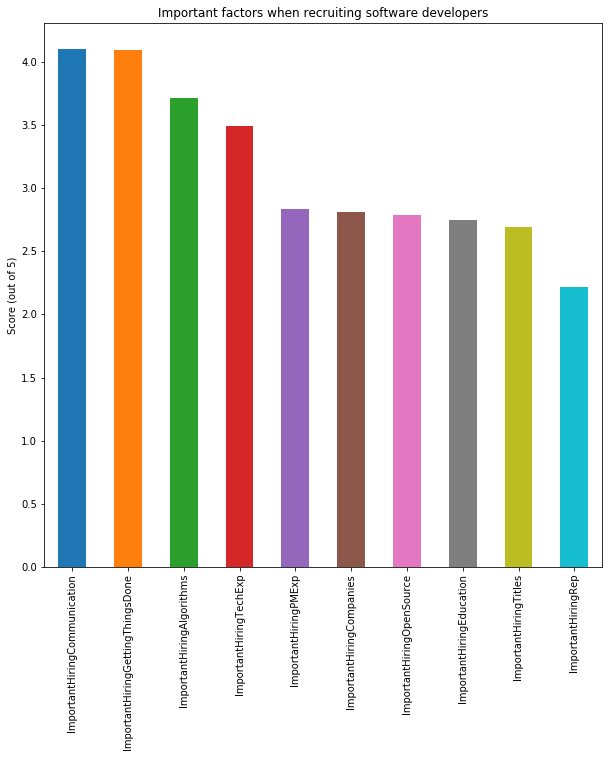

In [37]:
plt.figure(figsize=(10,10))
plt.ylabel('Score (out of 5)')
plt.title('Important factors when recruiting software developers')
scores_hire_imp.plot(kind = 'bar')
plt.savefig('Important factors when recruiting software developers')

### Evaluate the Results  
From the above graph we can see that:  
1) Top most things that people look for when recruiting software developers :
- ImportantHiringCommunication: Communication skills
- ImportantHiringGettingThingsDone: Track record of getting things done
- ImportantHiringAlgorithms: Knowledge of algorithms and data structures

2) Bottom most things that people look for when recruiting software developers :
- ImportantHiringRep: Stack Overflow reputation
- ImportantHiringTitles: Previous job titles held
- ImportantHiringEducation: Educational credentials (e.g. schools attended, specific field of study, grades earned)

**Insights**  
- It is not very surprising for me to see that skills like Communication skills and Track record of getting things done is more important than Knowledge of algorithms and data structures when recruiting software developers. It indicates the importance of communication skills in the mordern world.
- Stack Overflow reputation, Previous job titles held and Educational credentials are the least important things clearly signify the dynamic nature of this field and importance of updating knowledge base constantly. 


### Deploy  
Please find my blog **"Insights on software developers ! Use them for YOUR benefit !"** showcasing the results of this notebook for non-technical users/business stakeholders. Link is provided below:
https://medium.com/@bhathejagautam/insights-about-software-development-field-use-them-for-your-benefit-9ad0a70ed1bf
